## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
#To support both python 2 and python 3
from __future__  import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To make this nootbook´s outpost stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Get the data

In [2]:
import os
import tarfile
from six.moves import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Creates a function to fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# When we run this function, it creates a dataset and extracts the .CVS file containing the data.

fetch_housing_data()

In [4]:
# Creates a function to load the data. This function returns a pandas dataframe containing the data.

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# by using the info() method we can get a quick description of the data we have. By looking at the output we
# can se that the dataset cointains 20640 entries or instances. We can also se that all of the attributes in 
# the dataset are numercial except for "ocean_proximity" which is contains an object. Since the data is read
# from a .CVS file we know it is a text attribute as we can see by running the next line.

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


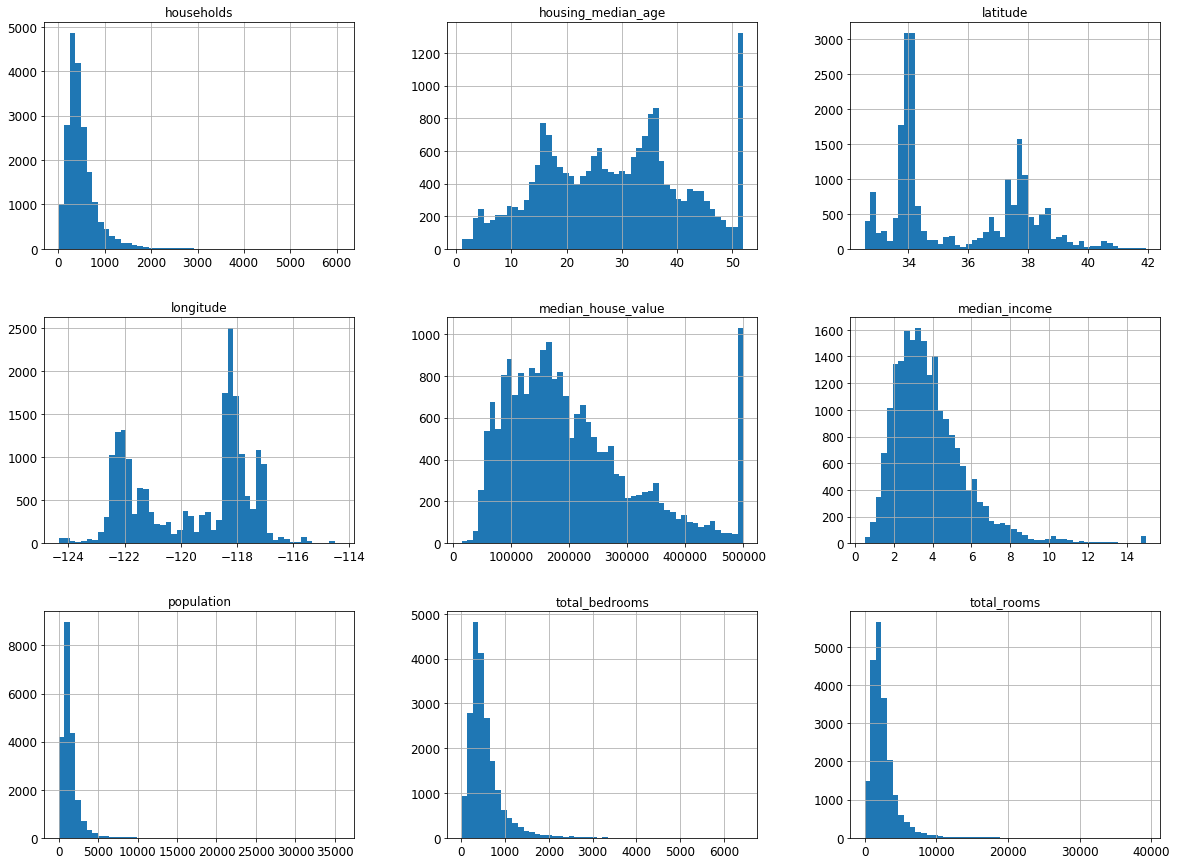

In [9]:
# Insted of describing the data like we did above, we can make a histogram plot. 

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# to make this nootbook´s output identical at every run
np.random.seed(42)

In [11]:
# Creates a test set of the data. The test set contains part of the data (in this case 20% of the full set).
# By running the code block above, we make sure that the learning data is identical each time we run the
# program. We do this to avoid the program from seein all of the data.

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# Function for crating the dataset.

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
# The method above works fine until you fetch an updated version of your dataset. Then the solution above
# will break. A common solution is to use each instance’s identifier to decide whether or not it should 
# go in the test set. 

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of test_set_check() above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:


In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:


In [15]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [16]:
# The housing dataset does not have instance identifiers, so the simplest solution is to use the
# row index as ID. 

housing_with_id = housing.reset_index() #adds an `index`column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
# Another option is to use longitude and latitude as identifiers, since they won't change for a long time.

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")    

In [18]:
# check that the id columns is added at the back.

test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [19]:
# You could also use Scikit-Learn to split your data into multiple subsets. We use the function "train_test_split"
# which basicly does the same as split_train_test, but with a couple of additional features.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


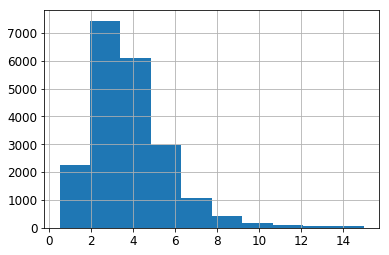

In [21]:
# prints a histogram based on income categories.
housing["median_income"].hist()

In [22]:
# Divide by 1.5 to limit the number of income catagories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [23]:
# Prints the data with new labels.

housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

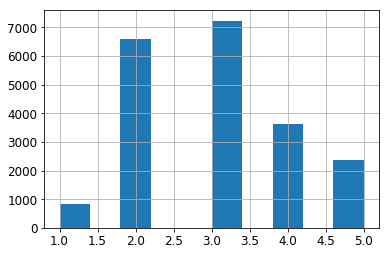

In [24]:
# prints a histogram of the data with new labels. 

housing["income_cat"].hist()

In [25]:
# Now we use stratified sampling based on the income category using StratifiedShuffleSplit class which is found
# in Scikit-Learn. 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
# Test if the new dataset is representative for the full dataset.

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [27]:
# Prints income category for the full dataset. 

housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
0                         

0

In [29]:
# By comparing the two datasets we can se that the test set is representative for the full dataset. In this 
# case we look at the overall and stratified column.

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [30]:
# Remove the income_cat attribute so the data is back to it's original state.

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and vizualize the data to gain insights

In [31]:
# makes a copy of the training set

housing = strat_train_set.copy()

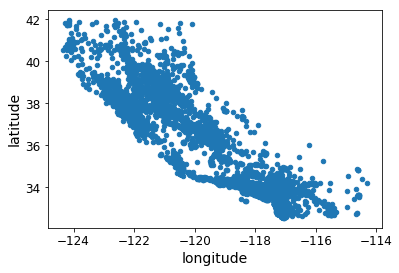

In [32]:
# Creates a scatterplot based on the geograpichal data in the dataset.

housing.plot(kind="scatter", x="longitude", y="latitude")


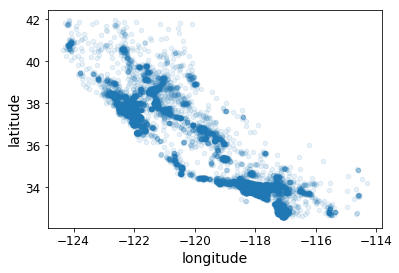

In [33]:
# The plot above does not give us any good patterns to look after. By setting the alpha option = 0.1 we 
# get a better visualization of where there is a high density of data points.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


the argument sharex=False fixes display bug (the x-axis values and laegend were not displayed). This is a temporary fix.

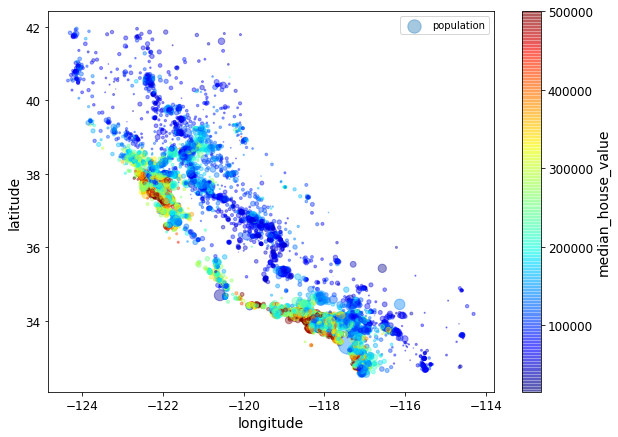

In [34]:
# We use a predifened color map (cmap) to visualize the data even better. The redius of the circles represents
# population and the color represent housing prices. Red represent high values and blue represent low values.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()


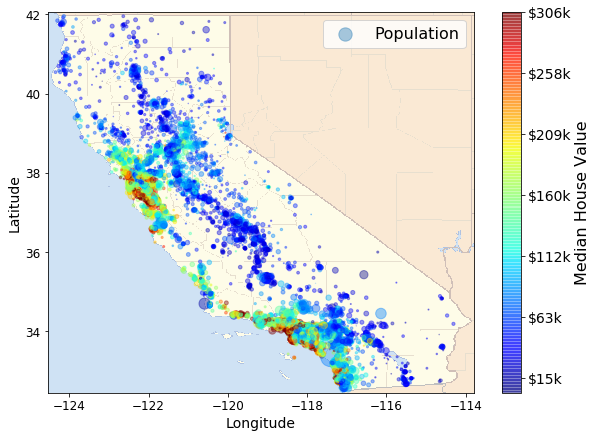

In [35]:
# imports an image and plots the data on top of the image.

import matplotlib.image as mpimg
california_img=mpimg.imread("." + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [36]:
# Computes the standard correlation coefficient.

corr_matrix = housing.corr()

In [37]:
# Looks at how much each attribute correlates with the median house value.

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690551
total_rooms           0.135290
housing_median_age    0.107099
households            0.066341
total_bedrooms        0.050002
population           -0.024069
longitude            -0.040318
latitude             -0.148121
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a019a20>,
      dtype=object)

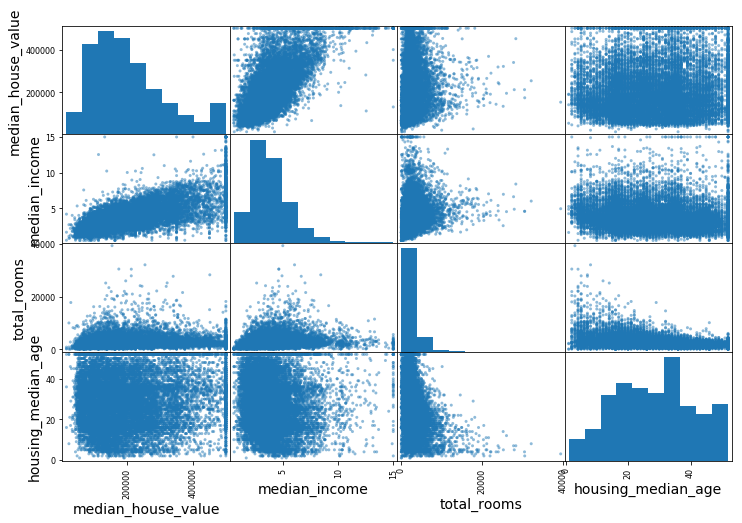

In [38]:
# Plots the four most promesing attributes that seems most correlated with the median house value.


from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


[0, 16, 0, 550000]

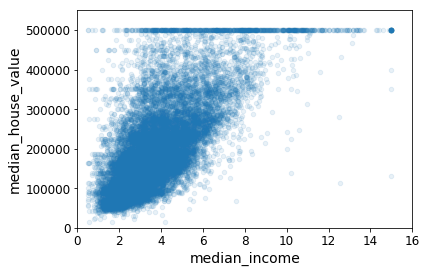

In [39]:
# Prints the most promesing attribute, which in this case is median income, up against the median house value.

housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)
plt.axis([0, 16, 0, 550000])


In [40]:
# In the next four code blocks we experiment with correlation between different attributes. We can 
# conclude that there is a high correlation between the new attribute ""bedrooms_per_room" and median house
# value. Obviously the larger the house, the more expensive they are.

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_houshold"] = housing["population"]/housing["households"]


Note: there was a bug in the previous cell, in the definition of the rooms_per_household attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [41]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.690551
rooms_per_household        0.156074
total_rooms                0.135290
housing_median_age         0.107099
households                 0.066341
total_bedrooms             0.050002
population_per_houshold   -0.022871
population                -0.024069
longitude                 -0.040318
latitude                  -0.148121
bedrooms_per_room         -0.257121
Name: median_house_value, dtype: float64

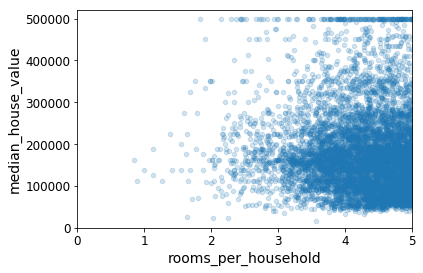

In [42]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()


In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_houshold
count,16512.000000,16512.000000,16512.000000,16512.000000,16355.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16355.000000,16512.000000
mean,-119.566563,35.627334,28.574673,2636.435441,538.548028,1425.384811,499.568132,3.867989,206975.990552,5.432954,0.213104,3.085380
std,2.002846,2.135798,12.571246,2161.070450,420.334368,1118.259608,380.328008,1.895637,115161.546625,2.503036,0.058481,11.454579
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1453.000000,297.000000,790.750000,280.000000,2.562500,120100.000000,4.441080,0.175424,2.431483
50%,-118.490000,34.250000,29.000000,2131.000000,436.000000,1166.000000,410.000000,3.533400,180400.000000,5.232849,0.203085,2.820659
75%,-118.010000,37.710000,37.000000,3146.250000,647.000000,1726.000000,604.000000,4.739375,264750.000000,6.057580,0.239804,3.282103
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the data for Machine Leraning algorithm

In [44]:
# Data cleaning to make sure that we have a new dataset, bacause we don't necessarily want to apply the 
# same transformations to the predictors and the target values.

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [45]:
# Most machine learning algorithms can't work when there are features missing. To solve this problem we take
# the median value of the training set and use this value to replace the blank fields. It's important to save
# this value for later use, either when you're going to evaluate your system og when it goes live. 

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,NEAR OCEAN
11449,-117.98,33.68,24.0,4177.0,NaN,1704.0,606.0,6.2473,<1H OCEAN
7330,-118.17,33.98,41.0,756.0,NaN,873.0,212.0,2.7321,<1H OCEAN
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN


In [46]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [47]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17041,-122.28,37.51,33.0,4719.0,1980.0,757.0,6.1064,NEAR OCEAN
11449,-117.98,33.68,24.0,4177.0,1704.0,606.0,6.2473,<1H OCEAN
7330,-118.17,33.98,41.0,756.0,873.0,212.0,2.7321,<1H OCEAN
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,INLAND
7806,-118.09,33.89,42.0,991.0,717.0,219.0,4.0926,<1H OCEAN


In [48]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17041,-122.28,37.51,33.0,4719.0,436.0,1980.0,757.0,6.1064,NEAR OCEAN
11449,-117.98,33.68,24.0,4177.0,436.0,1704.0,606.0,6.2473,<1H OCEAN
7330,-118.17,33.98,41.0,756.0,436.0,873.0,212.0,2.7321,<1H OCEAN
13311,-117.61,34.08,12.0,4427.0,436.0,2400.0,843.0,4.7147,INLAND
7806,-118.09,33.89,42.0,991.0,436.0,717.0,219.0,4.0926,<1H OCEAN


In [49]:
# Scikit-Learn has a class that solves this problem for us: Imputer. The imputer has calculated the median 
# and stored the variable. Only one attribute had missing values, but we can not be sure that there won't be
# any other missing values once the system goes live, so it's safer to just use imputer on all numercial
# attributes. 

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Remove the attribute because median can only calculate on numerical attributes:

In [50]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [51]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [52]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [53]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  436.    , 1166.    ,
        410.    ,    3.5334])

In [54]:
# Now we can use the trained imputer to raplace all of the missing fields by the calculated median.
# The result is a plain numpy array which easily can be transformed back to a Pandas DataFrame in the line below.


X = imputer.transform(housing_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = list(housing.index.values))

In [56]:
# shows "incomplete" rows with its imputer replaced values = 436.

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17041,-122.28,37.51,33.0,4719.0,436.0,1980.0,757.0,6.1064
11449,-117.98,33.68,24.0,4177.0,436.0,1704.0,606.0,6.2473
7330,-118.17,33.98,41.0,756.0,436.0,873.0,212.0,2.7321
13311,-117.61,34.08,12.0,4427.0,436.0,2400.0,843.0,4.7147
7806,-118.09,33.89,42.0,991.0,436.0,717.0,219.0,4.0926


In [57]:
imputer.strategy

'median'

In [58]:
# prints complete set after imputer replaceses empty values.

housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.93,34.06,28.0,3342.0,688.0,2210.0,647.0,3.4596
1,-117.94,33.87,46.0,2066.0,450.0,1275.0,448.0,3.9375
2,-121.84,37.32,16.0,1866.0,364.0,1835.0,412.0,5.3363
3,-116.99,33.20,17.0,2980.0,539.0,1531.0,505.0,3.1553
4,-122.49,38.10,43.0,1226.0,244.0,491.0,205.0,4.9286


In [59]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
6227,<1H OCEAN
10200,<1H OCEAN
17680,<1H OCEAN
15392,<1H OCEAN
9268,NEAR BAY
1671,NEAR BAY
2841,INLAND
17041,NEAR OCEAN
8523,<1H OCEAN
8735,<1H OCEAN


In [60]:
# Most machine learning algorithms prefer to work with numbers. The attribute ocean_proximity is a text attribute
# so we have to transform it. To transform a text attribute to a numerical attribute we use OrdinalEncoder
# from future_encoders. Now we can compute the median of the ocean_proximity attribute.

from future_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [1.],
       [4.],
       [0.],
       [0.]])

In [61]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
# There could arise problems when representing the categories this way. One problem is that the ML algorithm
# will presume that to categories that er close to each other are more simular then categories that are distant.
# For example category 0 and 4 are are more simular then 0 and 1. One solution to this problem is to make a 
# one binary attribute per category. This means that one attribute is equal to 1 when the category is 'ISLAND'
# and the the rest is 0, another attribute is 1 when the category is 'NEAR OCEAN' and so on. This is the 
# principal behind one-hot-encoding, where only one attribute is one(hot) and the rest is 0(cold).

from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
# The output above is a sparse matrix. This matrix stores only the location of the nonzero elements, which
# saves us a lot of memory usage. We could also transform it to a dense array using the method below.

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
# Here we write a costum transformer which makes space for the new combined attributes we found earlier
# through our correlation matrix in the test set. 


from sklearn.base import BaseEstimator, TransformerMixin

#column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [66]:
# Creates a pandas datagram with the extra attributes 'rooms_per_household' and 'population_per_household'.

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+ ["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-117.93,34.06,28,3342,688,2210,647,3.4596,<1H OCEAN,5.16538,3.41577
1,-117.94,33.87,46,2066,450,1275,448,3.9375,<1H OCEAN,4.61161,2.84598
2,-121.84,37.32,16,1866,364,1835,412,5.3363,<1H OCEAN,4.52913,4.45388
3,-116.99,33.2,17,2980,539,1531,505,3.1553,<1H OCEAN,5.90099,3.03168
4,-122.49,38.1,43,1226,244,491,205,4.9286,NEAR BAY,5.98049,2.39512


In [67]:
# When working with machine learning you need to perform a lot of data transformations in the right order.
# Scikit-Learn provieds the pipeline class which is usfull for such sequences of transformations. This is 
# a small pipeline for the numerical attributes.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[ 0.81714319, -0.73386229, -0.04571467, ..., -0.10690357,
         0.0288439 , -0.12119043],
       [ 0.81215014, -0.82282471,  1.38616772, ..., -0.32815018,
        -0.02090041,  0.05762806],
       [-1.13513781,  0.7925456 , -1.00030293, ..., -0.36110353,
         0.11947577, -0.28276142],
       ...,
       [-1.42972752,  0.98451714,  1.86346185, ..., -0.51257464,
         0.08542769, -0.13683814],
       [ 0.68732399, -0.74322676,  0.82932457, ..., -0.77745577,
         0.18784608,  1.29888896],
       [-1.5245954 ,  1.22799324, -0.68210685, ..., -0.26579617,
        -0.08726222,  0.05580927]])

In [69]:
from future_encoders import ColumnTransformer

In [70]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[ 0.81714319, -0.73386229, -0.04571467, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81215014, -0.82282471,  1.38616772, ...,  0.        ,
         0.        ,  0.        ],
       [-1.13513781,  0.7925456 , -1.00030293, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.42972752,  0.98451714,  1.86346185, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68732399, -0.74322676,  0.82932457, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5245954 ,  1.22799324, -0.68210685, ...,  0.        ,
         0.        ,  0.        ]])

In [72]:
housing_prepared.shape

(16512, 16)

## Select and train a model

In [73]:
# Here we use linear regression to train our model.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [184970.64678445 239340.4344935  246683.7951888  165288.35480714
 284539.6402469 ]


As we can see, the predictions aren't accurate. For Example the fourth prediction is off by nearly 35 %.

In [75]:
print("Labels:", list(some_labels))

Labels: [202800.0, 187000.0, 212800.0, 250000.0, 307000.0]


In [76]:
some_data_prepared

array([[ 0.81714319, -0.73386229, -0.04571467,  0.32649834,  0.35949755,
         0.70166082,  0.38765573, -0.21544264, -0.10690357,  0.0288439 ,
        -0.12119043,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.81215014, -0.82282471,  1.38616772, -0.26396766, -0.20928601,
        -0.1344852 , -0.13559268,  0.03667025, -0.32815018, -0.02090041,
         0.05762806,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.13513781,  0.7925456 , -1.00030293, -0.35651719, -0.41481284,
         0.36630814, -0.23025068,  0.77459767, -0.36110353,  0.11947577,
        -0.28276142,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.28648952, -1.13653431, -0.92075391,  0.15898369,  0.00341037,
         0.0944489 ,  0.01428249, -0.37597404,  0.18699297, -0.00468797,
        -0.49525196,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.4596858 ,  1.15775975,  1

In [77]:
# Now we use mean squared error on the whole training set to compute the models RMSE (root-mean-square error).
# We can see that the mean error is $68116 which isn't satisfying. The problem here is that the model is 
# underfitting the training data. To fix this we have to use a more powerfull model.


from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68116.54761715344

In [78]:
# By checking the mean absolute error we can see how far off our model predictions are. In this case our 
# models prediction is off by $49304 on average.

from sklearn.metrics import mean_absolute_error

lin_mea = mean_absolute_error(housing_labels, housing_predictions)
lin_mea

49304.82773988993

In [79]:
# Now we train a DecisionTreeRegressor insted. This is a more powerfull model that is capable of finding
# complex nonlinear relationships in the data.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [80]:
# As we can see the RMSE of the decision tree is 0. This is most likely caused by the model badly oferfitting 
# the data. 

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Fine-tune your model

In [81]:
# Here we use Scikit-Learn's cros_val_score which is a cross validation method. the code below performs 
# K-fold cross-validation where it randomly splits the training set into 10 distinct subsets. Then it 
# trins and evaluates the model 10 times, picking a different subset every time for evaluation and trains
# on the other 9 subsets. The result is an array contining 10 evaluation scores.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [82]:
def display_scores(scores):
    print("Score:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Score: [67957.33240078 69337.47596829 69500.94880008 66995.35959984
 69206.76238067 68824.88649565 66541.98006611 72195.17941491
 73775.75207333 72549.90230155]
Mean: 69688.55795012097
Standard deviation: 2290.4916766049378


If we look at the data above we can conclude that the regresion tree performs below what we earlier thought.
It has a score of approximately 69689 +- 2290. This information would be imposible to have if we didn't use
cross validation. 

in the code below we compute the score for linear regression. And by looking at the result we can conclude
that the regression tree overfits the data to that extent that it performs worse then linear regression.

In [83]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Score: [64212.8939011  67341.68004298 67257.98725219 67736.45141673
 73751.84280646 68317.17225103 67370.24975243 66870.4054549
 68647.94962971 73056.49423986]
Mean: 68456.31267473861
Standard deviation: 2723.2007236067475


In [84]:
# We try one last model, the RandomForrestRegressor. Random forrests works by training many decision trees 
# on random subsets of the features and then take the average of their predictions. 

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22133.9773132075

In [86]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Score: [50998.22766859 51919.48727326 51856.49720192 53133.38998283
 52954.12049927 50914.76753316 52111.69941062 52029.69249583
 53422.58249813 56808.7223514 ]
Mean: 52614.91869149961
Standard deviation: 1605.706433053847


Here we can see that the ForrestRegressor is perfoming better then the other two models. But the model still 
overfits the data. We can draw this conclusion by looking at the difference between the validation set and
the training score. 

In [87]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",
                        cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68456.312675
std       2870.505604
min      64212.893901
25%      67278.910450
50%      67553.350585
75%      68565.255285
max      73751.842806
dtype: float64

In [88]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110338.24602985624

Now that we have picked out our models it's time to fine tune them. Threre is a couple of ways to do this.
the first one is GridSearch. We use Scikit-Learn's GridSerachCV to search for the hyperparamters we want
to play around with. The code below shows how to search for the best combinations of hyperparamters for 
RandomForrestRegressor. The grid search will explore 18 different combinations of hyperparamters and then train each model 5 times. After the GridSearchCV has run it's course we will have the best combinations of paramters.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap' : [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},   
]

forrest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64459.51540277599 {'max_features': 2, 'n_estimators': 3}
55087.25211110338 {'max_features': 2, 'n_estimators': 10}
52787.9854879721 {'max_features': 2, 'n_estimators': 30}
59670.265725620244 {'max_features': 4, 'n_estimators': 3}
52484.39962939129 {'max_features': 4, 'n_estimators': 10}
49985.793338681295 {'max_features': 4, 'n_estimators': 30}
58021.634137902416 {'max_features': 6, 'n_estimators': 3}
51865.196529535235 {'max_features': 6, 'n_estimators': 10}
49931.41495433362 {'max_features': 6, 'n_estimators': 30}
58332.130458978754 {'max_features': 8, 'n_estimators': 3}
51999.81784472048 {'max_features': 8, 'n_estimators': 10}
49625.30161771687 {'max_features': 8, 'n_estimators': 30}
62246.46965730239 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54152.27135500568 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59404.09826604776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52196.43225666834 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076349,0.006825,0.004417,0.000539,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.904189e+09,-4.006038e+09,...,-4.155029e+09,1.751070e+08,18,-1.171071e+09,-1.113424e+09,-1.167081e+09,-1.122073e+09,-1.092400e+09,-1.133210e+09,3.085989e+07
1,0.244193,0.004475,0.013304,0.000721,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.810297e+09,-3.039600e+09,...,-3.034605e+09,1.415482e+08,11,-5.681056e+08,-5.770443e+08,-5.799522e+08,-5.849083e+08,-5.632908e+08,-5.746602e+08,7.885911e+06
2,0.750681,0.013552,0.034851,0.001043,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.661457e+09,-2.790485e+09,...,-2.786571e+09,1.149098e+08,9,-4.339943e+08,-4.365742e+08,-4.266001e+08,-4.387350e+08,-4.278667e+08,-4.327540e+08,4.767804e+06
3,0.119868,0.001155,0.004547,0.000677,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.478673e+09,-3.648461e+09,...,-3.560541e+09,8.806837e+07,16,-9.372192e+08,-9.006436e+08,-9.535649e+08,-1.000571e+09,-9.262644e+08,-9.436527e+08,3.326103e+07
4,0.417033,0.021801,0.014508,0.002367,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.696822e+09,-2.747594e+09,...,-2.754612e+09,1.355281e+08,8,-5.056841e+08,-4.987914e+08,-5.158371e+08,-5.264129e+08,-5.050111e+08,-5.103473e+08,9.715966e+06
5,1.242318,0.048198,0.035106,0.002191,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.398410e+09,-2.466713e+09,...,-2.498580e+09,1.292355e+08,3,-3.857649e+08,-3.814762e+08,-3.855875e+08,-3.823663e+08,-3.757271e+08,-3.821844e+08,3.650564e+06
6,0.164465,0.002233,0.005245,0.000599,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.137677e+09,-3.603187e+09,...,-3.366510e+09,1.609103e+08,13,-8.899485e+08,-9.240295e+08,-8.999108e+08,-8.861273e+08,-8.424348e+08,-8.884902e+08,2.654159e+07
7,0.562156,0.023160,0.013841,0.001587,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.526533e+09,-2.695397e+09,...,-2.689999e+09,1.545421e+08,5,-4.801374e+08,-4.920406e+08,-4.957578e+08,-5.055082e+08,-4.794000e+08,-4.905688e+08,9.857318e+06
8,1.656178,0.013667,0.036062,0.002033,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.358606e+09,-2.471094e+09,...,-2.493146e+09,1.347259e+08,2,-3.721847e+08,-3.822146e+08,-3.812903e+08,-3.906257e+08,-3.802478e+08,-3.813126e+08,5.865140e+06
9,0.210087,0.002093,0.004910,0.000577,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.219647e+09,-3.410359e+09,...,-3.402637e+09,1.338830e+08,14,-9.040697e+08,-9.013115e+08,-8.568783e+08,-8.881553e+08,-8.755762e+08,-8.851982e+08,1.743054e+07


In [94]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076349,0.006825,0.004417,0.000539,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.904189e+09,-4.006038e+09,...,-4.155029e+09,1.751070e+08,18,-1.171071e+09,-1.113424e+09,-1.167081e+09,-1.122073e+09,-1.092400e+09,-1.133210e+09,3.085989e+07
1,0.244193,0.004475,0.013304,0.000721,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.810297e+09,-3.039600e+09,...,-3.034605e+09,1.415482e+08,11,-5.681056e+08,-5.770443e+08,-5.799522e+08,-5.849083e+08,-5.632908e+08,-5.746602e+08,7.885911e+06
2,0.750681,0.013552,0.034851,0.001043,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.661457e+09,-2.790485e+09,...,-2.786571e+09,1.149098e+08,9,-4.339943e+08,-4.365742e+08,-4.266001e+08,-4.387350e+08,-4.278667e+08,-4.327540e+08,4.767804e+06
3,0.119868,0.001155,0.004547,0.000677,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.478673e+09,-3.648461e+09,...,-3.560541e+09,8.806837e+07,16,-9.372192e+08,-9.006436e+08,-9.535649e+08,-1.000571e+09,-9.262644e+08,-9.436527e+08,3.326103e+07
4,0.417033,0.021801,0.014508,0.002367,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.696822e+09,-2.747594e+09,...,-2.754612e+09,1.355281e+08,8,-5.056841e+08,-4.987914e+08,-5.158371e+08,-5.264129e+08,-5.050111e+08,-5.103473e+08,9.715966e+06
5,1.242318,0.048198,0.035106,0.002191,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.398410e+09,-2.466713e+09,...,-2.498580e+09,1.292355e+08,3,-3.857649e+08,-3.814762e+08,-3.855875e+08,-3.823663e+08,-3.757271e+08,-3.821844e+08,3.650564e+06
6,0.164465,0.002233,0.005245,0.000599,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.137677e+09,-3.603187e+09,...,-3.366510e+09,1.609103e+08,13,-8.899485e+08,-9.240295e+08,-8.999108e+08,-8.861273e+08,-8.424348e+08,-8.884902e+08,2.654159e+07
7,0.562156,0.023160,0.013841,0.001587,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.526533e+09,-2.695397e+09,...,-2.689999e+09,1.545421e+08,5,-4.801374e+08,-4.920406e+08,-4.957578e+08,-5.055082e+08,-4.794000e+08,-4.905688e+08,9.857318e+06
8,1.656178,0.013667,0.036062,0.002033,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.358606e+09,-2.471094e+09,...,-2.493146e+09,1.347259e+08,2,-3.721847e+08,-3.822146e+08,-3.812903e+08,-3.906257e+08,-3.802478e+08,-3.813126e+08,5.865140e+06
9,0.210087,0.002093,0.004910,0.000577,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.219647e+09,-3.410359e+09,...,-3.402637e+09,1.338830e+08,14,-9.040697e+08,-9.013115e+08,-8.568783e+08,-8.881553e+08,-8.755762e+08,-8.851982e+08,1.743054e+07


When the hyperparameter search space is large, it's better to use RandomizedSearchCV instead. This class works much like the GridSearchCV class, but instead of trying out all of the possible combinations it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

This method has two main benefits:
1. You can test a lot more combinations of hyperparamters depending on how many iterations you want to run.
2. You can descide how many combinations you want to try, simply by chosing how many iterations you want to run.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11a207f60>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10a323d68>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [96]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
                             

48952.65914316506 {'max_features': 7, 'n_estimators': 180}
51630.39786105418 {'max_features': 5, 'n_estimators': 15}
50325.39396387183 {'max_features': 3, 'n_estimators': 72}
50937.09762991359 {'max_features': 5, 'n_estimators': 21}
49107.63412993458 {'max_features': 7, 'n_estimators': 122}
50301.98786761906 {'max_features': 3, 'n_estimators': 75}
50195.005289622735 {'max_features': 3, 'n_estimators': 88}
49331.04931127133 {'max_features': 5, 'n_estimators': 100}
50072.048063303824 {'max_features': 3, 'n_estimators': 150}
65153.569040321 {'max_features': 5, 'n_estimators': 2}


In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.01752042e-02, 6.09966598e-02, 4.25853348e-02, 1.45114079e-02,
       1.36104584e-02, 1.41628197e-02, 1.38367612e-02, 3.76691159e-01,
       5.50140556e-02, 1.05796448e-01, 5.65895926e-02, 7.58374398e-03,
       1.62660234e-01, 1.57352429e-04, 1.80193480e-03, 3.82683313e-03])

In [98]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37669115945188475, 'median_income'),
 (0.16266023423486559, 'INLAND'),
 (0.1057964476714764, 'pop_per_hhold'),
 (0.0701752041738716, 'longitude'),
 (0.06099665981100348, 'latitude'),
 (0.05658959263916693, 'bedrooms_per_room'),
 (0.05501405564657032, 'rooms_per_hhold'),
 (0.04258533483483289, 'housing_median_age'),
 (0.014511407946499582, 'total_rooms'),
 (0.014162819663511093, 'population'),
 (0.01383676116626419, 'households'),
 (0.013610458415203695, 'total_bedrooms'),
 (0.007583743982629916, '<1H OCEAN'),
 (0.0038268331306497505, 'NEAR OCEAN'),
 (0.0018019348025721561, 'NEAR BAY'),
 (0.00015735242899781777, 'ISLAND')]

The final model is now ready to be evaluated. Below there are result with both Grid Search and Randomized Search. We can see that the Randomized Search predicts a little bit better than Grid Search.

In [99]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [100]:
final_rmse

48898.12412566609

In [101]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [102]:
final_rmse

48627.18560818803

In [103]:

from scipy import stats

confidence  = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([46340.06785221, 50811.46004396])

In [104]:
final_model.score(X_test_prepared, y_test)

0.8252546872130996

The accuracy of the model is 82.5%

## Evaluate the system

In this project we analyzed housing prices in california from 1990. The dataset had different properties, for example madian income and madian house price, for each district in California. By looking at the correlation between the different properties we found the attributes that were most likly to be dependent on each other. 

The best result was given when using the RandomForrestRegression with RandomSearchCV. This method gave me an accuracy of 82.5%.

## Launch and monitor the system

When the system is up and running it's important to write monitoring code to check the systems performance and trigger alerts when the performance drops. It's important to not only trigger the alarm when there is a sudden drop in performance, but also if the performance drops over time. This tends to happen because models "rot" over time if you don't feed it fresh data.

Perhaps the most important thing is to make sure that the quality of the input data is good. You may have sensors sending bad or arandom signals or some other form of drop in data quality. If you monitor your system inputs you can catch this early insted of waiting for your system to trigger the alarm and therefore correct the data "before it's to late". 

If you have an online learning system it's especially important that you take snapshot of the systems state evry so often. If you take snapshots you can easily roll back your system to a working state if it fails og breaks down.